,CasosDia,Temp. Ins. (C),Umi. Ins. (%),Chuva (mm),CasosDiasTarget
Data,,,,,
2020-03-22,3,26.616667,42.500000,4.453936,4
2020-03-23,3,26.462500,52.833333,4.453936,2
2020-03-24,3,24.812500,64.541667,8.800000,2
2020-03-25,1,22.008333,82.000000,28.800000,2
2020-03-26,0,21.225000,83.666667,0.200000,3
...,...,...,...,...,...
2023-12-27,8,22.787500,80.750000,4.453936,3
2023-12-28,4,24.291667,70.416667,4.453936,6
2023-12-29,7,25.687500,69.083333,4.453936,6


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1380 entries, 2020-03-22 to 2023-12-31
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CasosDia         1380 non-null   int64  
 1   Temp. Ins. (C)   1380 non-null   float64
 2   Umi. Ins. (%)    1380 non-null   float64
 3   Chuva (mm)       1380 non-null   float64
 4   CasosDiasTarget  1380 non-null   int64  
dtypes: float64(3), int64(2)
memory usage: 64.7 KB


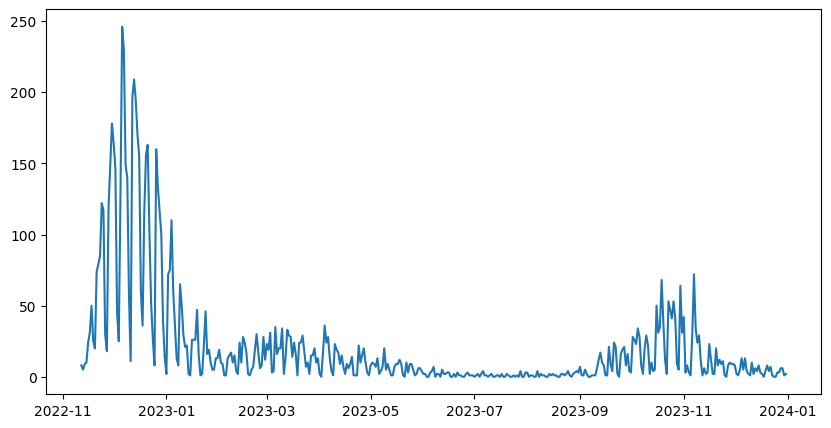

In [1]:
##IMPORTANDO

#from google.colab import drive
#drive.mount('/content/drive')
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statistics
from scipy.stats import mannwhitneyu
from sklearn.metrics import mean_squared_error, mean_absolute_error
import sklearn as sk
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVR 
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import accuracy_score
from scipy.stats import mannwhitneyu
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor

# Evitar avisos
import warnings
warnings.filterwarnings("ignore")


df = pd.read_csv("planilhas/dfDias7desloc.csv", sep=';', parse_dates=['Data'], index_col="Data")
display(df)
df.info()

split = int(0.7 * len(df))
treino = df[:split]
teste = df[split:]


x_treino = treino.drop(columns='CasosDiasTarget')
y_treino = treino['CasosDiasTarget']

x_teste = teste.drop(columns='CasosDiasTarget')
y_teste = teste['CasosDiasTarget']

# Plotar as previsões em relação aos valores reais

plt.figure(figsize=(10, 5))
plt.plot(y_teste)



# Randon Forest


In [2]:
#RF


mseRF = []
rmseRF= []
maeRF= []

p_RFcriterion = []
p_RFn_estimators  = []
p_RFmin_samples_leaf = []

param_grid = {
    'criterion': ['squared_error', 'absolute_error'],
    'n_estimators': [10, 20,30,40,50,60,70,80,90,100,200,300,400,500],
    'min_samples_leaf': [2,3,4],
}
melhor_validacao_RF = 1000
best_paramsRF = {}



for i in range(20):
    print(i+1)
    for criterion in param_grid['criterion']:
        for n_estimators in param_grid['n_estimators']:
            for min_samples_leaf in param_grid['min_samples_leaf']:
                RF = RandomForestRegressor(
                    criterion=criterion,
                    n_estimators=n_estimators,
                    min_samples_leaf=min_samples_leaf,
                )
                RF.fit(x_treino, y_treino)
                opiniao = RF.predict(x_teste)
                mse_validacao_RF = mean_squared_error(y_teste, opiniao)
                
                if (mse_validacao_RF < melhor_validacao_RF):
                    melhor_validacao_RF = mse_validacao_RF
                    best_paramsRF = {
                        'criterion': criterion,
                        'n_estimators': n_estimators,
                        'min_samples_leaf': min_samples_leaf,
                    }


    print(melhor_validacao_RF)
    print(mse_validacao_RF)
    print(best_paramsRF)

    RF = RandomForestRegressor(
                    criterion=best_paramsRF['criterion'],
                    n_estimators=best_paramsRF['n_estimators'],
                    min_samples_leaf=best_paramsRF['min_samples_leaf'],
                )
    
    RF.fit(x_treino, y_treino)
    opiniao_RF = RF.predict(x_teste)

    mae = mean_absolute_error(y_teste, opiniao_RF).round(2)
    mse = mean_squared_error(y_teste, opiniao_RF).round(2)
    rmse = np.sqrt(mse).round(2)

    maeRF.append(mae)
    mseRF.append(mse)
    rmseRF.append(rmse)

    p_RFcriterion.append(best_paramsRF['criterion'])
    p_RFn_estimators.append(best_paramsRF['n_estimators'])
    p_RFmin_samples_leaf.append(best_paramsRF['min_samples_leaf'])


# RESULTADOS !!!!
maxp_RFcriterion = max(set(p_RFcriterion), key=p_RFcriterion.count)
maxp_RFn_estimators = max(set(p_RFn_estimators), key=p_RFn_estimators.count)
maxp_RFmin_samples_leaf = max(set(p_RFmin_samples_leaf), key=p_RFmin_samples_leaf.count)


media_maeRF = np.mean(maeRF)
media_mseRF = np.mean(mseRF)
media_rmseRF = np.mean(rmseRF)

p_RFcriterion.append(maxp_RFcriterion)
p_RFn_estimators.append(p_RFn_estimators)
p_RFmin_samples_leaf.append(p_RFmin_samples_leaf)

maeRF.append(media_maeRF)
mseRF.append(media_mseRF)
rmseRF.append(media_rmseRF)

dfRF = pd.DataFrame({
    'criterion':p_RFcriterion,
    'n_estimators':p_RFn_estimators,
    'min_samples_leaf':p_RFmin_samples_leaf,
    'MAE': maeRF,
    'MSE': mseRF,
    'RMSE': rmseRF
})

print("O ÚLTIMO VALOR (20) É A MÉDIA !!!")

display(dfRF)
dfRF.to_csv('resultadosModelos/dfRF.csv', sep = ';', index = False, encoding='UTF-8')


1
375.9608693105756
393.33447913012054
{'criterion': 'absolute_error', 'n_estimators': 60, 'min_samples_leaf': 4}
2
375.9608693105756
390.433339513253
{'criterion': 'absolute_error', 'n_estimators': 60, 'min_samples_leaf': 4}
3
375.9608693105756
392.8267217012048
{'criterion': 'absolute_error', 'n_estimators': 60, 'min_samples_leaf': 4}
4
375.9608693105756
389.9343446891566
{'criterion': 'absolute_error', 'n_estimators': 60, 'min_samples_leaf': 4}
5
375.9608693105756
387.62588622409635
{'criterion': 'absolute_error', 'n_estimators': 60, 'min_samples_leaf': 4}
6
375.9608693105756
391.94580260963863
{'criterion': 'absolute_error', 'n_estimators': 60, 'min_samples_leaf': 4}
7
375.9608693105756
390.4612373325302
{'criterion': 'absolute_error', 'n_estimators': 60, 'min_samples_leaf': 4}
8
375.9608693105756
389.62293985783134
{'criterion': 'absolute_error', 'n_estimators': 60, 'min_samples_leaf': 4}
9
375.9608693105756
393.7653041855421
{'criterion': 'absolute_error', 'n_estimators': 60, 'mi

,criterion,n_estimators,min_samples_leaf,MAE,MSE,RMSE
0,absolute_error,60,4,11.5500,406.660,20.1700
1,absolute_error,60,4,11.6100,402.170,20.0500
2,absolute_error,60,4,11.4400,387.770,19.6900
3,absolute_error,60,4,11.4800,407.990,20.2000
4,absolute_error,60,4,11.4900,393.840,19.8500
5,absolute_error,60,4,11.6500,401.890,20.0500
6,absolute_error,60,4,11.2600,383.070,19.5700
7,absolute_error,60,4,11.4600,403.580,20.0900
8,absolute_error,60,4,11.4900,386.980,19.6700
9,absolute_error,60,4,11.2100,388.710,19.7200


DatetimeIndex(['2022-11-12', '2022-11-13', '2022-11-14', '2022-11-15',
               '2022-11-16', '2022-11-17', '2022-11-18', '2022-11-19',
               '2022-11-20', '2022-11-21',
               ...
               '2023-12-22', '2023-12-23', '2023-12-24', '2023-12-25',
               '2023-12-26', '2023-12-27', '2023-12-28', '2023-12-29',
               '2023-12-30', '2023-12-31'],
              dtype='datetime64[ns]', name='Data', length=415, freq=None)


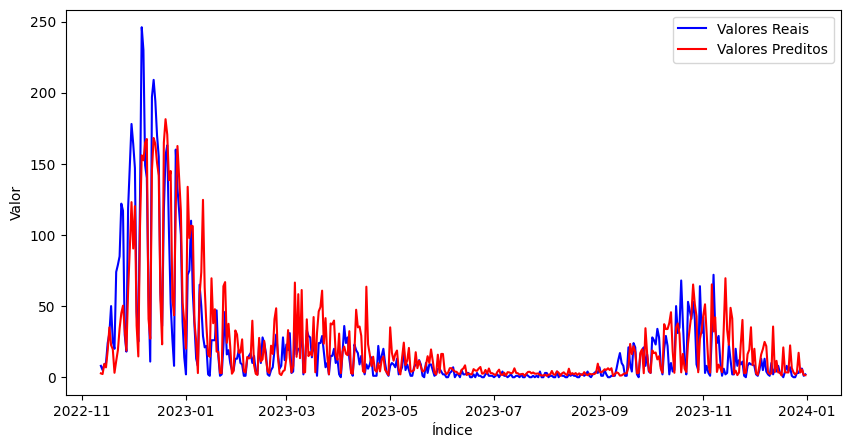

Numero de casos reais:  8737
Numero de casos predito:  9869


In [3]:
len(opiniao_RF)

print(x_teste.index)

serieRF = pd.Series(opiniao_RF, index=x_teste.index)


plt.figure(figsize=(10, 5))
plt.plot(y_teste, label='Valores Reais', color='blue',linewidth=1)
plt.plot(serieRF, label='Valores Preditos', color='red', linewidth=1)
plt.xlabel('Índice')
plt.ylabel('Valor')
plt.legend()
plt.show()

n_pred = int(opiniao_RF.sum())
print('Numero de casos reais: ', y_teste.sum())
print('Numero de casos predito: ', n_pred)